In [245]:
import math

from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import expon, skew
from scipy import integrate
import seaborn as sns
import math
plt.rcParams['figure.figsize'] = [15, 7]

# 1

In [246]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df = pd.DataFrame(arff_file[0])

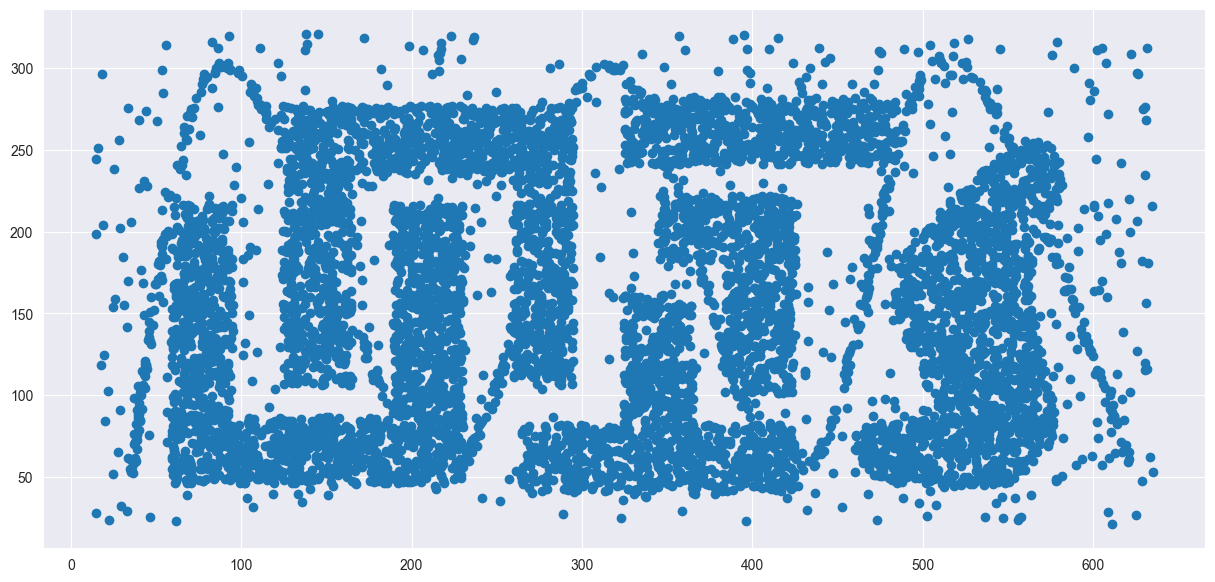

In [247]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [248]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [249]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

4.502627637714651


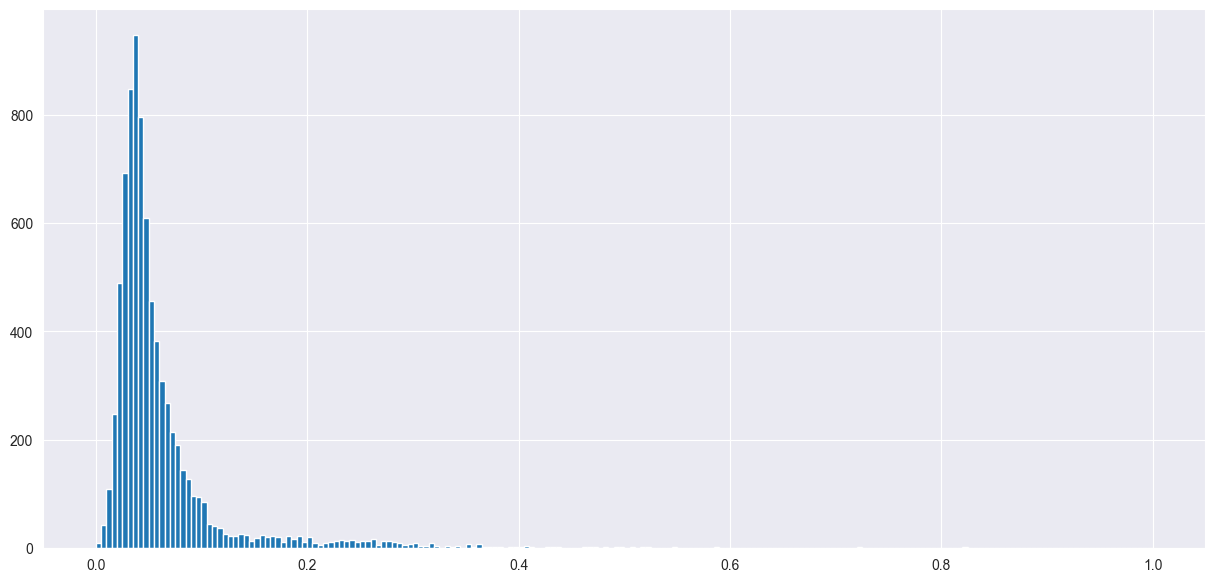

In [250]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
print(skew(arr))
plt.hist(arr,bins=200)
plt.show()

In [251]:
means = np.mean(arr)
inMean = 1/means

In [252]:
posNeg1 = []
spaceStep1 = np.linspace(.7,.99,20)
for e in spaceStep1:
    ker = -means*np.log(1-e)
    print(-means*np.log(1-.88))
    f = integrate.quad(lambda x: inMean*np.exp(-x*inMean), 0, ker)
    newArr = arr < ker
    print(f)
    posNeg1.append([(y[~newArr] == 6).sum(),(y[~newArr] != 6).sum()])

print(posNeg1)

0.13629260114844954
(0.7000000000000001, 7.771561172376096e-15)
0.13629260114844954
(0.7152631578947369, 7.941016265608358e-15)
0.13629260114844954
(0.7305263157894737, 8.110471358840617e-15)
0.13629260114844954
(0.7457894736842106, 8.279926452072878e-15)
0.13629260114844954
(0.7610526315789472, 8.449381545305137e-15)
0.13629260114844954
(0.7763157894736842, 8.6188366385374e-15)
0.13629260114844954
(0.7915789473684212, 8.78829173176966e-15)
0.13629260114844954
(0.8068421052631579, 8.957746825001922e-15)
0.13629260114844954
(0.8221052631578947, 9.12720191823418e-15)
0.13629260114844954
(0.8373684210526315, 9.296657011466442e-15)
0.13629260114844954
(0.8526315789473685, 9.466112104698704e-15)
0.13629260114844954
(0.8678947368421052, 9.635567197930963e-15)
0.13629260114844954
(0.8831578947368423, 9.805022291163226e-15)
0.13629260114844954
(0.8984210526315789, 9.974477384395485e-15)
0.13629260114844954
(0.9136842105263159, 1.0143932477627747e-14)
0.13629260114844954
(0.9289473684210525, 1.

[ True  True  True ...  True  True  True]


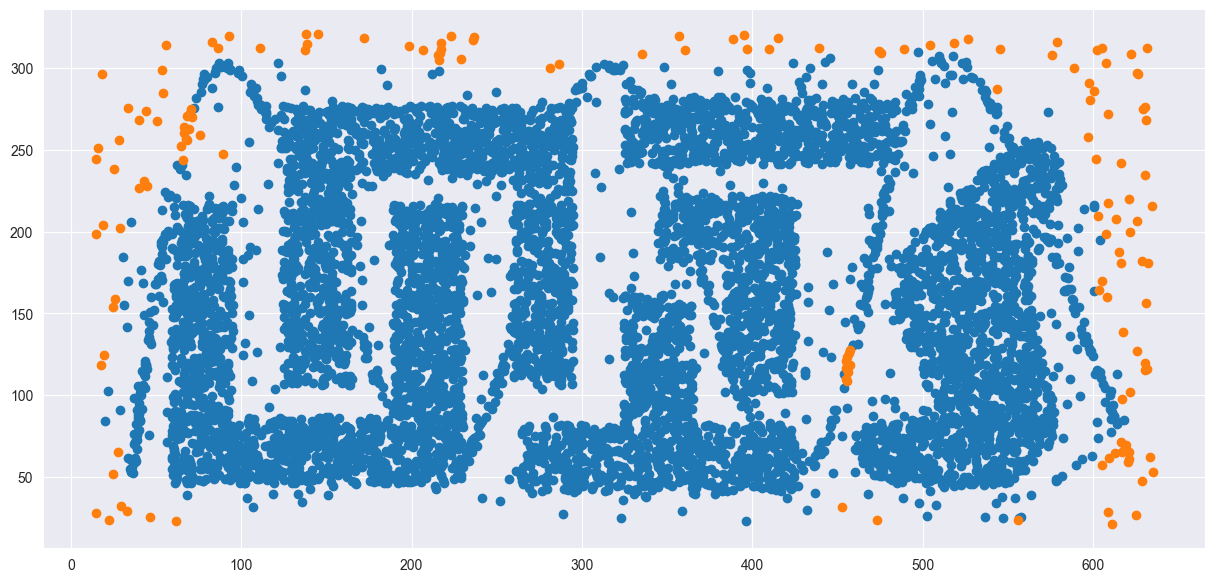

In [253]:

print(newArr)
plt.scatter(X[newArr,0],X[newArr,1])
plt.scatter(X[~newArr,0],X[~newArr,1])
plt.show()

(7845, 2) (155, 2)
155 0


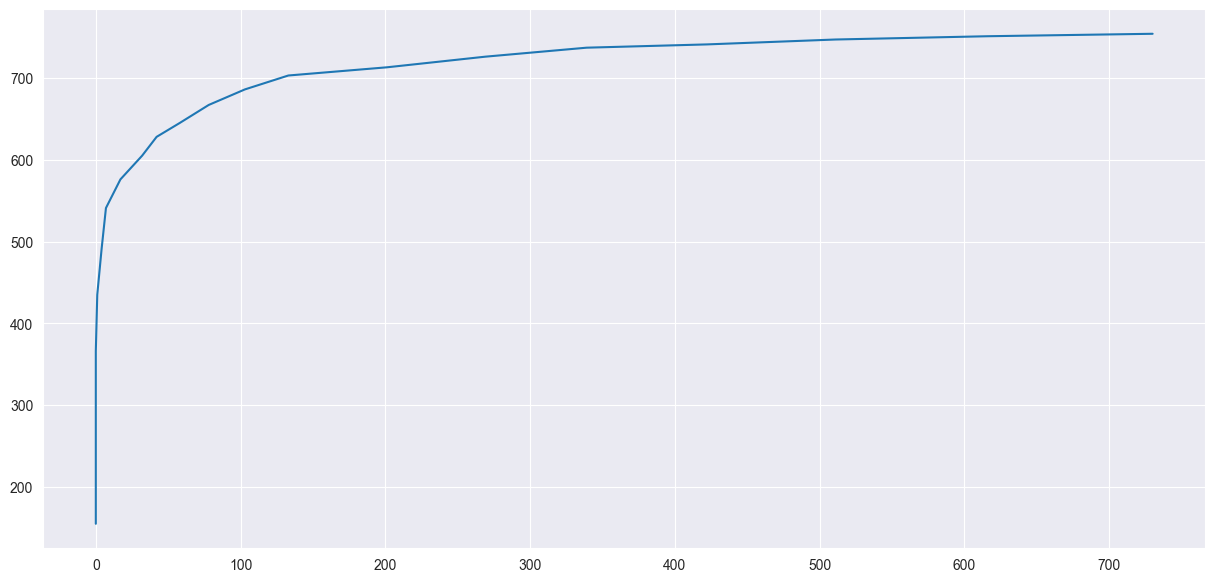

-525254.5


In [254]:
print(X[newArr].shape,X[~newArr].shape)
print((y[~newArr] == 6).sum(),(y[~newArr] != 6).sum())
posNeg1 = np.array(posNeg1)
plt.plot(posNeg1[:,1],posNeg1[:,0])
plt.show()
print(integrate.trapezoid(posNeg1[:,0],posNeg1[:,1]))

In [255]:
total2 = integrate.trapezoid(posNeg1[:,0], x=posNeg1[:,1] / (posNeg1[0][0]*posNeg1[0][1])) * -100
print(total2)
# 525254.5 / 550420 = 95.43

95.42794593219722


# 1

# 2

In [256]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t7-10k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()

,x,y,CLASS
9995,451.783997,372.544006,b'6'
9996,550.674988,327.447998,b'1'
9997,474.742004,161.518005,b'3'
9998,535.835022,375.765991,b'1'
9999,234.878006,181.878006,b'8'


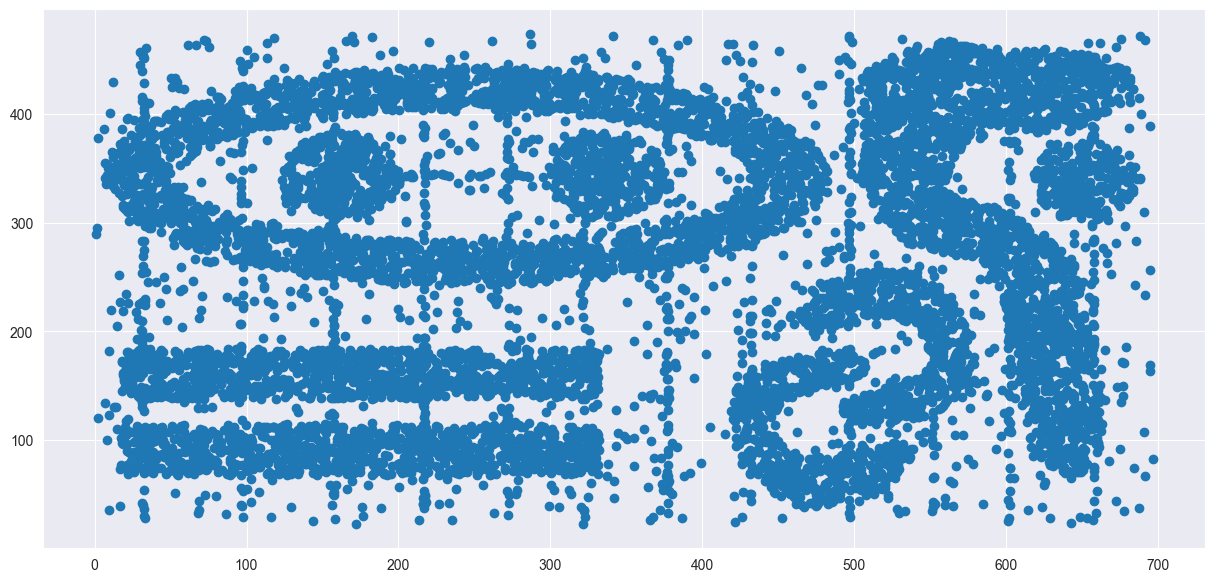

In [257]:
plt.scatter(df3['x'],df3['y'])
plt.show()

In [258]:
X = df3.iloc[:,:2].values
y = df3.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [259]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

0.2587328328359233
(0.7000000000000001, 7.771561172376096e-15)
(8149, 2) (1851, 2)
791 1060
0.2587328328359233
(0.7152631578947368, 7.941016265608357e-15)
(8324, 2) (1676, 2)
791 885
0.2587328328359233
(0.7305263157894737, 8.110471358840617e-15)
(8485, 2) (1515, 2)
790 725
0.2587328328359233
(0.7457894736842102, 8.279926452072875e-15)
(8645, 2) (1355, 2)
787 568
0.2587328328359233
(0.7610526315789474, 8.449381545305139e-15)
(8783, 2) (1217, 2)
783 434
0.2587328328359233
(0.7763157894736842, 8.6188366385374e-15)
(8893, 2) (1107, 2)
781 326
0.2587328328359233
(0.791578947368421, 8.78829173176966e-15)
(8986, 2) (1014, 2)
779 235
0.2587328328359233
(0.8068421052631579, 8.957746825001922e-15)
(9054, 2) (946, 2)
773 173
0.2587328328359233
(0.8221052631578947, 9.12720191823418e-15)
(9116, 2) (884, 2)
762 122
0.2587328328359233
(0.8373684210526314, 9.29665701146644e-15)
(9170, 2) (830, 2)
747 83
0.2587328328359233
(0.8526315789473684, 9.466112104698702e-15)
(9219, 2) (781, 2)
727 54
0.25873283

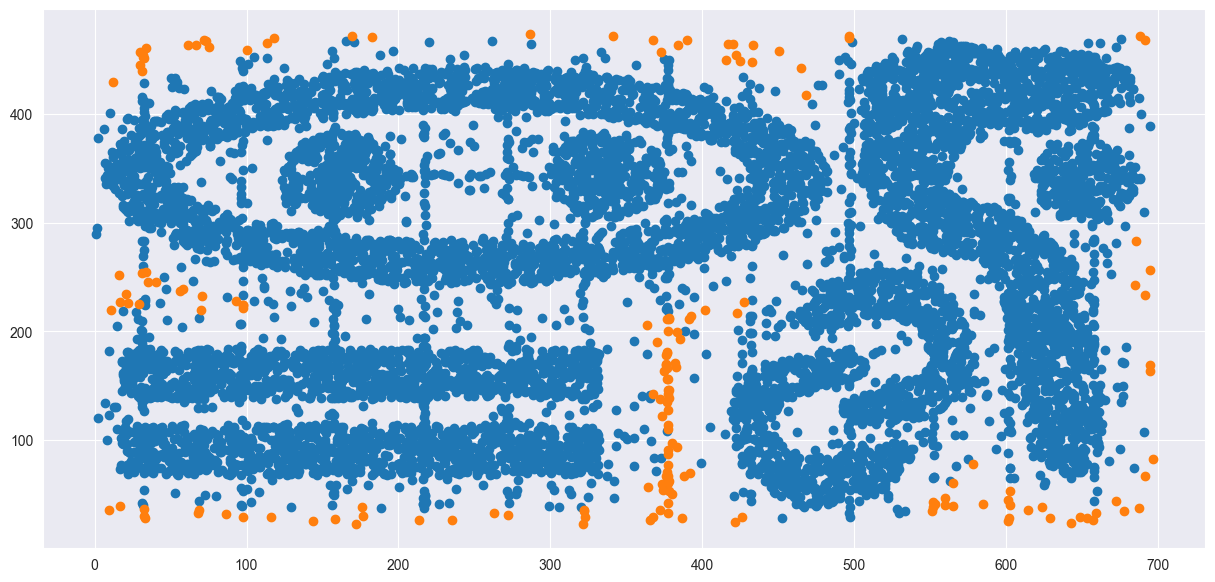

In [260]:
means = np.mean(arr)
inMean = 1 / means
posNeg = []
spaceStep = np.linspace(.7,.99,20)
for e in spaceStep:
    ker = -means * np.log(1 - e)
    print(-means * np.log(1 - .88))
    f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
    print(f)
    newArr = arr < ker
    print(X[newArr].shape, X[~newArr].shape)
    print((y[~newArr] == 9).sum(), (y[~newArr] != 9).sum())
    posNeg.append([(y[~newArr] == 9).sum(), (y[~newArr] != 9).sum()])
    y.max()
print(newArr)
print(posNeg)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

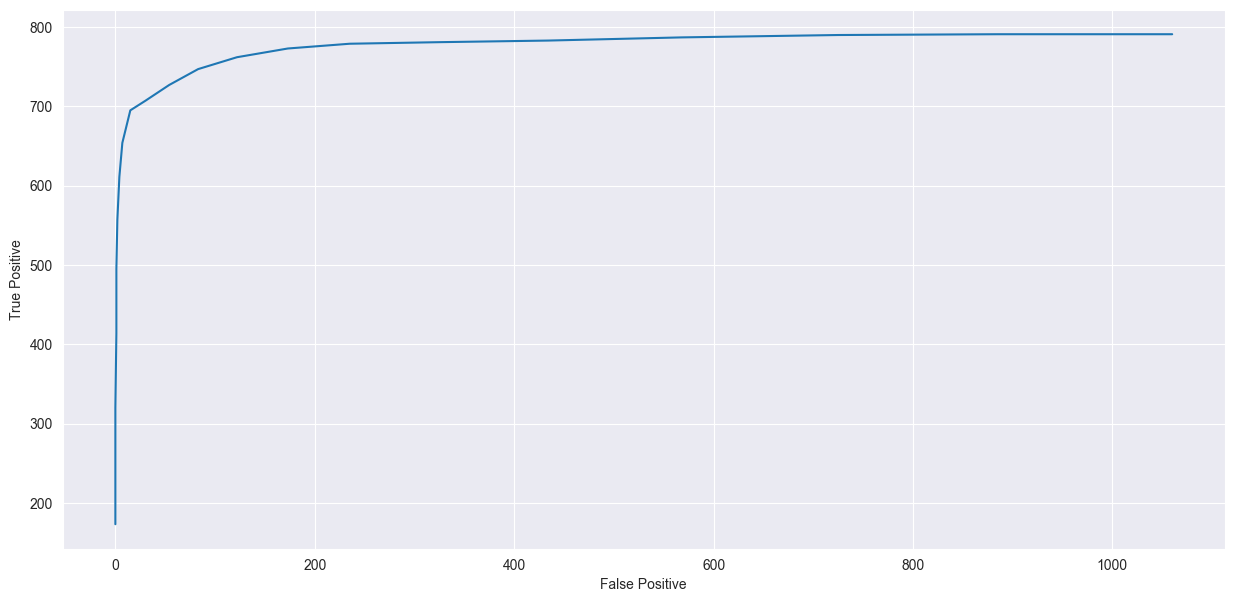

-824456.0


In [261]:
posNeg = np.array(posNeg)
plt.plot(posNeg[:,1], posNeg[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()
print(integrate.trapezoid(posNeg[:,0], x=posNeg[:,1]))

In [262]:
total2 = integrate.trapezoid(posNeg[:,0], x=posNeg[:,1] / (posNeg[0][0]*posNeg[0][1])) * -100
print(total2)
#824456
#~= 98.3%

98.32979510054149


# 2

# 3

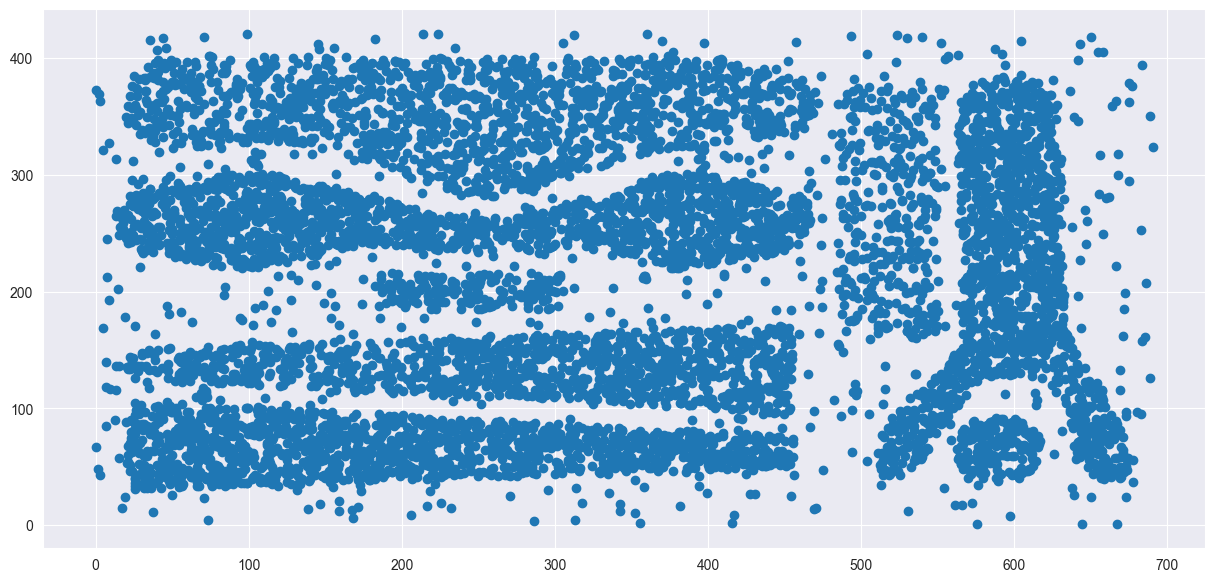

0.28091740534542736
(0.92, 1.021405182655144e-14)
[ True  True  True ...  True  True  True]


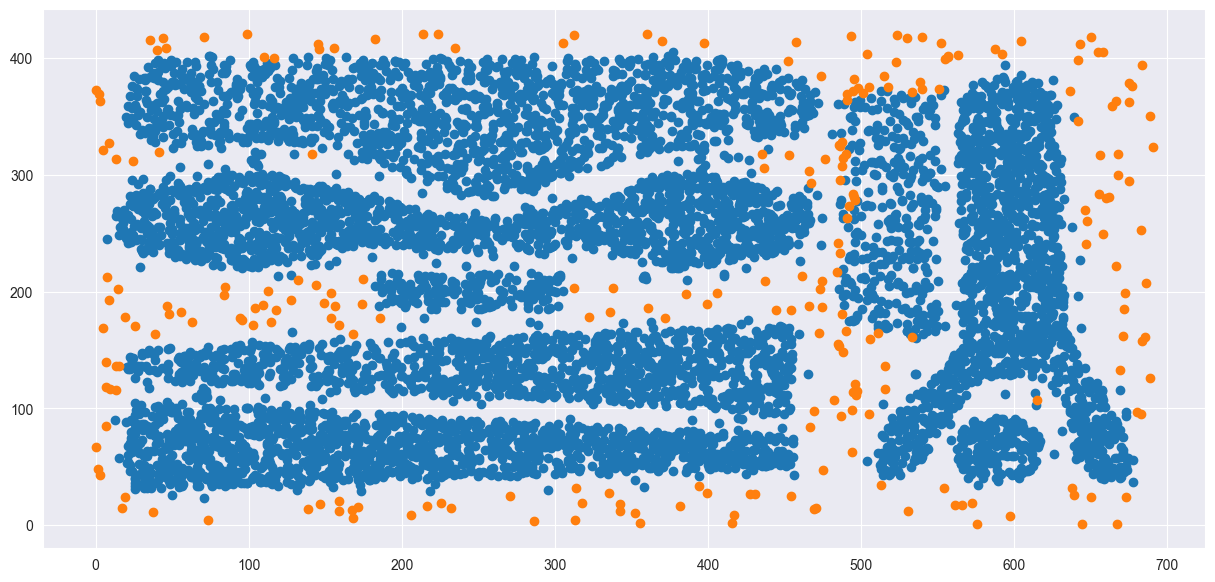

In [263]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t8-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()
plt.scatter(df3['x'], df3['y'])
plt.show()
X = df3.iloc[:, :2].values
y = df3.iloc[:, 2].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist


knn, distReturn = main(X, y, 35)


def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
means = np.mean(arr)
inMean = 1 / means
ker = -means * np.log(1 - .92)
print(-means * np.log(1 - .92))
f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
print(f)
newArr = arr < ker
print(newArr)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

In [264]:
print(X[newArr].shape, X[~newArr].shape)
print((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())
print((y==8).sum())

(7749, 2) (251, 2)
209 42
323
